# 04 - Linear Regression - Analysis

## Table of Contents:
1. Import libraries + data
2. Data prep for regression analysis
3. Regression analysis
4. Performance improvement

## Import libraries + data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import data path
path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Craft_Beer_Sales_Analysis'

In [3]:
# import beer_clean_final.pkl
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'beer_clean_final.pkl'))

In [4]:
df_final.head()

,product_code,vendor,name,retail_price,product_unit,vendor_country,size,abv,full_date,year,...,units_sold,revenue,discount,profit,percent_markup,percent_discount,_merge,abv_category,month_no,weekday_no
0,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-03,2022,...,2.0,420.00,180.00,140.00,50.00,30.00,both,low abv,7,6
1,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-09,2022,...,4.0,960.00,240.00,400.00,71.43,20.00,both,low abv,7,5
2,5028,nan,1 Symbiotica Apple 0.375,300.0,Pieces,Russia,0.375,4.5,2022-07-19,2022,...,5.0,1440.00,60.00,740.00,105.71,4.00,both,low abv,7,1
3,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-20,2022,...,4.0,412.23,277.77,52.23,14.51,40.26,both,low abv,3,6
4,4846,nan,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,Russia,0.330,3.0,2022-03-23,2022,...,2.0,360.00,40.00,180.00,100.00,10.00,both,low abv,3,2


In [5]:
df_final.shape

(43487, 24)

In [6]:
# display all columns
pd.options.display.max_columns = None

In [7]:
# display 100 rows
pd.options.display.max_rows = 100

In [8]:
# ensures that the graphs are displayed within the notebook without the need to "call" them.

%matplotlib inline

## 2. Data prep for regression analysis

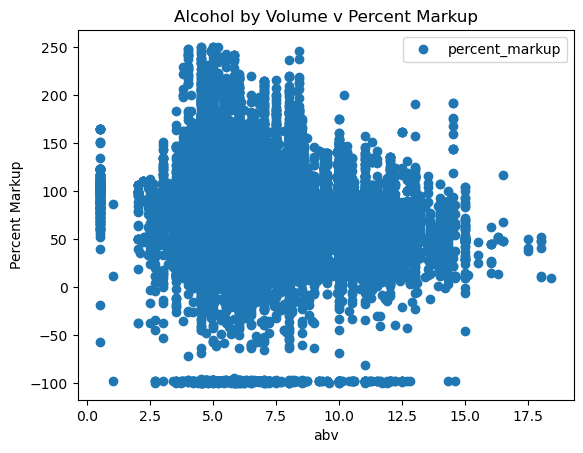

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_final.plot(x = 'abv', y='percent_markup',style='o')
plt.title('Alcohol by Volume v Percent Markup')  
plt.xlabel('abv')  
plt.ylabel('Percent Markup')  
plt.show()

### Hypothesis - When abv rises, percent markup will drop.

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df_final['abv'].values.reshape(-1,1)
y = df_final['percent_markup'].values.reshape(-1,1)

In [11]:
x

array([[4.5],
       [4.5],
       [4.5],
       ...,
       [4.8],
       [4.8],
       [4.8]])

In [12]:
y

array([[ 50.  ],
       [ 71.43],
       [105.71],
       ...,
       [106.89],
       [101.28],
       [100.27]])

In [13]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using x.

y_predicted = regression.predict(x_test)

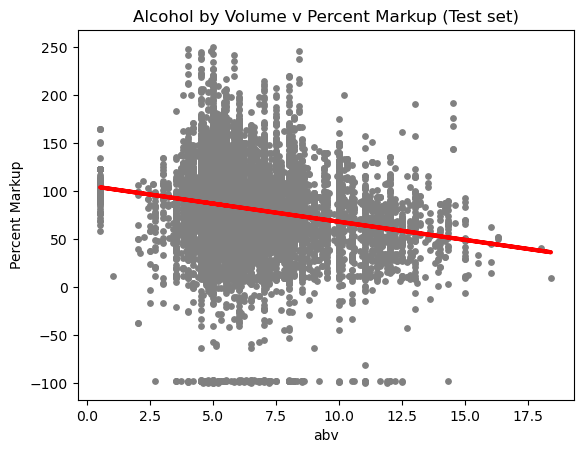

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Alcohol by Volume v Percent Markup (Test set)')
plot_test.xlabel('abv')
plot_test.ylabel('Percent Markup')
plot_test.show()

### Notes - There are many dots close to the line, however there are many more that fall outside the line. There are some outliers to look at, specifically the dots below 0 percent markup and abv that's at 0.

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.77700246]]
Mean squared error:  1889.5785819023642
R2 score:  0.035678564564316284


In [20]:
y_predicted

array([[ 87.86878487],
       [ 73.13847527],
       [ 79.9370797 ],
       ...,
       [ 59.54126641],
       [103.7321952 ],
       [ 84.8471829 ]])

In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,109.44,87.868785
1,143.69,73.138475
2,35.49,79.937080
3,2.74,81.070180
4,-97.93,79.937080
5,96.67,81.070180
6,104.63,81.070180
7,59.99,92.401188
8,133.33,84.847183
9,82.35,75.404677


### Compare how the regression fits the training set

In [22]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting x_train!

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.77700246]]
Mean squared error:  1912.0962565742661
R2 score:  0.03312514793305976


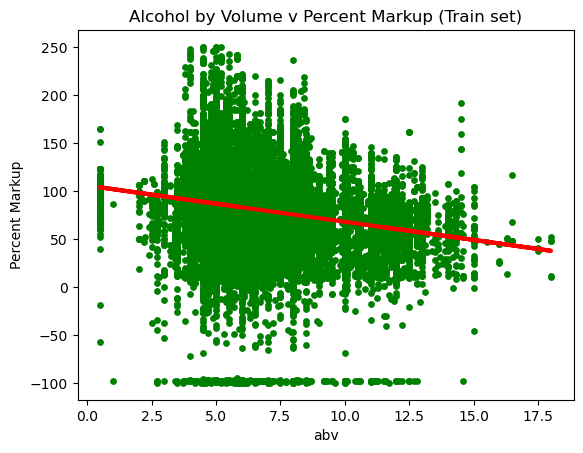

In [25]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Alcohol by Volume v Percent Markup (Train set)')
plot_test.xlabel('abv')
plot_test.ylabel('Percent Markup')
plot_test.show()

### Notes - 

## 4. Performance improvement

In [26]:
# Clean the values under 0 from the "percent_markup" column to exclude discounts from the analysis.

df_test = df_final[df_final['percent_markup'] >=0] 

In [27]:
# remove non-alcoholic beers from the analysis.

df_test = df_test[df_test['abv'] >0.5]

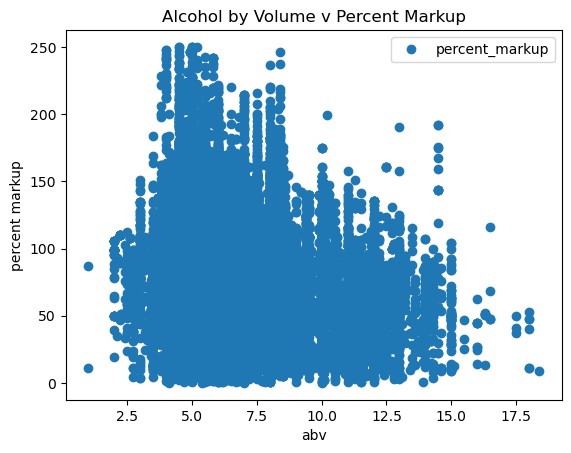

In [28]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'abv', y='percent_markup', style='o')  
plt.title('Alcohol by Volume v Percent Markup')  
plt.xlabel('abv')  
plt.ylabel('percent markup')  
plt.show()

In [29]:
# Reshape again.

x_2 = df_test['abv'].values.reshape(-1,1)
y_2 = df_test['percent_markup'].values.reshape(-1,1)

In [30]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0)

In [31]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [32]:
# Predict.

y_predicted_2 = regression.predict(x_test_2)

In [33]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.91714998]]
Mean squared error:  1316.2323853936832
R2 score:  0.05046455663526872


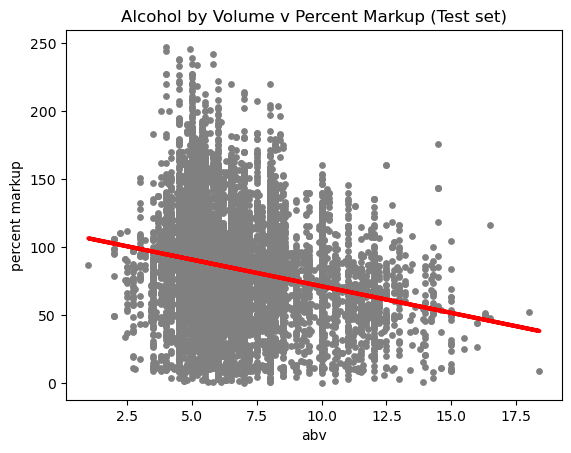

In [35]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(x_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(x_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Alcohol by Volume v Percent Markup (Test set)')
plot_test.xlabel('abv')
plot_test.ylabel('percent markup')
plot_test.show()

In [36]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,90.97,83.891668
1,100.00,90.942538
2,107.10,92.117683
3,74.70,88.592248
4,70.56,88.983963
5,106.25,92.901113
6,72.34,78.015943
7,85.48,88.983963
8,49.83,61.563913
9,91.86,90.159108


### Observations - The rmse is quite large, which shows that this regression line isn't an accurate representation of the data and can't predict how abv influences percent markup. Also, since the r2 value is 0.05, this shows the model is a poor fit. Another indicator that shows the model not performing well would be the differences between the actual and predicted y values.